In [14]:
import os
import json
import openai
from tqdm import tqdm
import numpy as np

# New imports for BERTopic
!pip install bertopic
!pip install sentence_transformers
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer



In [20]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Colab_Notebooks/AI/'
api_keys_path = base_path+'api_keys.txt'


with open(api_keys_path) as f:
    for line in f:
        key, value = line.strip().split('=')
        os.environ[key] = value
# ——— CONFIGURATION ———
JSON_DIR       = base_path+"filtered_json_files"
OUTPUT_MAPPING = base_path+"abstract_topics.json"
# Note: BERTopic will choose its own number of clusters


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:

# ——— STEP 1: LOAD ABSTRACTS ———
abstracts = {}
for fname in os.listdir(JSON_DIR):
    if not fname.endswith(".json"):
        continue
    path = os.path.join(JSON_DIR, fname)
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    abstract = data.get("abstract", "").strip()
    if abstract:
        abstracts[fname] = abstract

print(f"Loaded {len(abstracts)} abstracts.")

Loaded 195 abstracts.


In [38]:
import openai

openai_api_key = os.environ['OPENAI_API_KEY']

# ——— STEP 2: LABEL WITH GPT‑4 ———

def label_topic(
        abstract: str,
        model: str = "gpt-4o-mini",
        temperature: float = 0.2,
        top_p: float = 1.0,
        max_tokens: int = 32,
) -> str:
    """
    Given an abstract, call ChatGPT to return a short topic label.
    The label should be ≤ 6 words, lowercase, no punctuation.
    """
    system_msg = (
        "You are a research‑assistant bot. "
        "When given an academic abstract, respond with ONE short topic label "
        "(≤ 6 words, lowercase, no punctuation)."
    )
    user_msg = f"Abstract:\n{abstract}\n\nTopic:"
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_msg},
            {"role": "user",   "content": user_msg},
        ],
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens,
        n=1,
    )
    return response.choices[0].message.content.strip()


In [40]:

topic_map = {}
for fname, abstract in tqdm(abstracts.items(), desc="Labeling"):
    try:
        topic = label_topic(abstract)
        print(topic)
    except Exception as e:
        topic = f"[ERROR: {e}]"
       # print(topic)
    topic_map[fname] = topic

# Save your mapping
with open(OUTPUT_MAPPING, "w", encoding="utf-8") as out:
    json.dump(topic_map, out, indent=2)

print(f"Saved topic mapping to {OUTPUT_MAPPING}")


Labeling:   1%|          | 1/195 [00:00<01:10,  2.77it/s]

language models and dataset bias


Labeling:   1%|          | 2/195 [00:00<01:09,  2.78it/s]

llm code training implications


Labeling:   2%|▏         | 3/195 [00:01<01:08,  2.80it/s]

large language models evaluation


Labeling:   2%|▏         | 4/195 [00:05<06:34,  2.06s/it]

machine translation evaluation with llms


Labeling:   3%|▎         | 5/195 [00:06<04:34,  1.45s/it]

complex visual reasoning models


Labeling:   3%|▎         | 6/195 [00:06<03:36,  1.14s/it]

parallel corpora in multilingual models


Labeling:   4%|▎         | 7/195 [00:08<04:29,  1.43s/it]

distractibility in language models


Labeling:   4%|▍         | 8/195 [00:09<03:28,  1.12s/it]

topological analysis of language models


Labeling:   5%|▍         | 9/195 [00:09<02:45,  1.13it/s]

robosourcing in education


Labeling:   5%|▌         | 10/195 [00:09<02:15,  1.36it/s]

enhancing programming error messages


Labeling:   6%|▌         | 11/195 [00:10<02:04,  1.47it/s]

cognitive science and ai understanding


Labeling:   6%|▌         | 12/195 [00:10<01:46,  1.72it/s]

large language models for tabular data


Labeling:   7%|▋         | 13/195 [00:11<01:35,  1.91it/s]

code synthesis and language models


Labeling:   7%|▋         | 14/195 [00:11<01:34,  1.91it/s]

paraphrasing with large language models


Labeling:   8%|▊         | 15/195 [00:12<01:27,  2.05it/s]

language model evaluation


Labeling:   8%|▊         | 16/195 [00:12<01:28,  2.02it/s]

large language models and analogy reasoning


Labeling:   9%|▊         | 17/195 [00:13<01:35,  1.86it/s]

chain-of-thought reasoning in language models


Labeling:   9%|▉         | 18/195 [00:13<01:30,  1.97it/s]

very large language models in text mining


Labeling:  10%|▉         | 19/195 [00:14<01:29,  1.97it/s]

nl2code large language models survey


Labeling:  10%|█         | 20/195 [00:14<01:24,  2.07it/s]

sentence simplification with language models


Labeling:  11%|█         | 21/195 [00:15<01:27,  1.98it/s]

explanation of language models


Labeling:  11%|█▏        | 22/195 [00:15<01:23,  2.07it/s]

improving translation metrics with llms


Labeling:  12%|█▏        | 23/195 [00:16<01:56,  1.48it/s]

gamification in programming education


Labeling:  12%|█▏        | 24/195 [00:17<01:50,  1.54it/s]

large language models in psycholinguistics


Labeling:  13%|█▎        | 25/195 [00:17<01:39,  1.72it/s]

collaborative game design framework


Labeling:  13%|█▎        | 26/195 [00:18<02:06,  1.33it/s]

large language models in academia


Labeling:  14%|█▍        | 27/195 [00:19<01:47,  1.56it/s]

automated proof checking in education


Labeling:  14%|█▍        | 28/195 [00:19<01:33,  1.79it/s]

large language models in robotics


Labeling:  15%|█▍        | 29/195 [00:20<01:24,  1.97it/s]

arithmetic evaluation of language models


Labeling:  15%|█▌        | 30/195 [00:20<01:25,  1.93it/s]

business process management and language models


Labeling:  16%|█▌        | 31/195 [00:21<01:25,  1.91it/s]

instruction-tuning for language models


Labeling:  16%|█▋        | 32/195 [00:21<01:17,  2.10it/s]

language models for logic correction


Labeling:  17%|█▋        | 33/195 [00:21<01:14,  2.19it/s]

large language models in engineering


Labeling:  17%|█▋        | 34/195 [00:22<01:17,  2.08it/s]

few-shot relation extraction with language models


Labeling:  18%|█▊        | 35/195 [00:22<01:09,  2.29it/s]

language models in theorem proving


Labeling:  18%|█▊        | 36/195 [00:23<01:06,  2.39it/s]

llms for visualizations


Labeling:  19%|█▉        | 37/195 [00:23<01:10,  2.25it/s]

large language models in education


Labeling:  19%|█▉        | 38/195 [00:24<01:06,  2.35it/s]

evaluating topic models with llms


Labeling:  20%|██        | 39/195 [00:24<01:08,  2.28it/s]

meta-in-context learning in language models


Labeling:  21%|██        | 40/195 [00:25<01:19,  1.96it/s]

retrieval-augmented language models


Labeling:  21%|██        | 41/195 [00:25<01:11,  2.16it/s]

self-correcting translation models


Labeling:  22%|██▏       | 42/195 [00:26<01:15,  2.03it/s]

large language models and cognition


Labeling:  22%|██▏       | 43/195 [00:26<01:11,  2.12it/s]

recursion in language models


Labeling:  23%|██▎       | 44/195 [00:27<01:11,  2.11it/s]

language models and puzzle solving


Labeling:  23%|██▎       | 45/195 [00:27<01:16,  1.97it/s]

italian conversational language model


Labeling:  24%|██▎       | 46/195 [00:27<01:08,  2.17it/s]

parameter efficient fine tuning


Labeling:  24%|██▍       | 47/195 [00:28<01:11,  2.06it/s]

large language models in design processes


Labeling:  25%|██▍       | 48/195 [00:28<01:06,  2.20it/s]

biomedical concept linking with llms


Labeling:  25%|██▌       | 49/195 [00:29<01:04,  2.26it/s]

large language models in recruitment


Labeling:  26%|██▌       | 50/195 [00:29<01:04,  2.25it/s]

negated questions in language models


Labeling:  26%|██▌       | 51/195 [00:30<01:04,  2.25it/s]

large language models overview


Labeling:  27%|██▋       | 52/195 [00:30<01:05,  2.19it/s]

zero-shot reasoning in crime detection


Labeling:  27%|██▋       | 53/195 [00:31<01:10,  2.01it/s]

dynamic language models on blockchains


Labeling:  28%|██▊       | 54/195 [00:31<01:16,  1.84it/s]

compiler error messages and debugging


Labeling:  28%|██▊       | 55/195 [00:32<01:14,  1.89it/s]

process mining and language models


Labeling:  29%|██▊       | 56/195 [00:32<01:10,  1.96it/s]

traffic safety language models


Labeling:  29%|██▉       | 57/195 [00:33<01:04,  2.15it/s]

multilevel large language models


Labeling:  30%|██▉       | 58/195 [00:33<01:01,  2.23it/s]

children's story generation evaluation


Labeling:  30%|███       | 59/195 [00:34<01:15,  1.80it/s]

ontology enrichment with language models


Labeling:  31%|███       | 60/195 [00:34<01:11,  1.88it/s]

correction in language models


Labeling:  31%|███▏      | 61/195 [00:35<01:09,  1.93it/s]

subtokenization in source code models


Labeling:  32%|███▏      | 62/195 [00:36<01:18,  1.69it/s]

ethical implications of language models


Labeling:  32%|███▏      | 63/195 [00:36<01:13,  1.80it/s]

pharmaceutical data querying interface


Labeling:  33%|███▎      | 64/195 [00:37<01:13,  1.79it/s]

agent-based modeling and language models


Labeling:  33%|███▎      | 65/195 [00:37<01:06,  1.96it/s]

conversational recommendation systems


Labeling:  34%|███▍      | 66/195 [00:38<01:03,  2.02it/s]

large language models deployment framework


Labeling:  34%|███▍      | 67/195 [00:38<01:00,  2.12it/s]

efficient training of language models


Labeling:  35%|███▍      | 68/195 [00:38<00:56,  2.23it/s]

large language models in food testing


Labeling:  35%|███▌      | 69/195 [00:39<00:56,  2.21it/s]

large language models in education


Labeling:  36%|███▌      | 70/195 [00:39<00:56,  2.19it/s]

copyright-free training of language models


Labeling:  36%|███▋      | 71/195 [00:40<00:58,  2.13it/s]

large language models reasoning critique


Labeling:  37%|███▋      | 72/195 [00:40<00:59,  2.06it/s]

geometric perspective on adversarial attacks


Labeling:  37%|███▋      | 73/195 [00:41<00:58,  2.08it/s]

language models and knowledge organization


Labeling:  38%|███▊      | 74/195 [00:41<00:55,  2.16it/s]

knowledge-based visual question answering


Labeling:  38%|███▊      | 75/195 [00:42<00:56,  2.11it/s]

retrieval-augmented generation evaluation


Labeling:  39%|███▉      | 76/195 [00:42<00:55,  2.13it/s]

disinformation analysis with llm


Labeling:  39%|███▉      | 77/195 [00:43<00:58,  2.01it/s]

large language models in planning


Labeling:  40%|████      | 78/195 [00:43<00:53,  2.20it/s]

efficient large language models


Labeling:  41%|████      | 79/195 [00:44<00:52,  2.20it/s]

ontology alignment with language models


Labeling:  41%|████      | 80/195 [00:44<00:53,  2.15it/s]

knowledge sanitization in language models


Labeling:  42%|████▏     | 81/195 [00:45<01:02,  1.82it/s]

gpt models in code generation


Labeling:  42%|████▏     | 82/195 [00:45<00:56,  1.99it/s]

knowledge engineering and language models


Labeling:  43%|████▎     | 83/195 [00:47<01:28,  1.26it/s]

alignment vulnerabilities in language models


Labeling:  43%|████▎     | 84/195 [00:47<01:12,  1.53it/s]

zero-shot reasoning enhancement


Labeling:  44%|████▎     | 85/195 [00:47<01:03,  1.72it/s]

llms in spatial data management


Labeling:  44%|████▍     | 86/195 [00:48<00:57,  1.90it/s]

iterative retrieval-generation framework


Labeling:  45%|████▍     | 87/195 [00:48<01:00,  1.80it/s]

visual navigation with language models


Labeling:  45%|████▌     | 88/195 [00:49<00:55,  1.94it/s]

distributed training strategies for language models


Labeling:  46%|████▌     | 89/195 [00:52<02:03,  1.17s/it]

few-shot decontextualization in nlp


Labeling:  46%|████▌     | 90/195 [00:52<01:37,  1.07it/s]

road network generation using llm


Labeling:  47%|████▋     | 91/195 [00:53<01:37,  1.07it/s]

creativity in language models


Labeling:  47%|████▋     | 92/195 [00:53<01:22,  1.25it/s]

case-based reasoning and deep learning


Labeling:  48%|████▊     | 93/195 [00:54<01:12,  1.40it/s]

federated learning for language models


Labeling:  48%|████▊     | 94/195 [00:54<01:01,  1.64it/s]

data contamination in model evaluation


Labeling:  49%|████▊     | 95/195 [00:55<00:55,  1.80it/s]

watermarking large language models


Labeling:  49%|████▉     | 96/195 [00:55<00:47,  2.07it/s]

privacy preservation in language models


Labeling:  50%|████▉     | 97/195 [00:56<00:48,  2.01it/s]

requirement refinement in code generation


Labeling:  50%|█████     | 98/195 [00:56<00:45,  2.15it/s]

multilingual capabilities of language models


Labeling:  51%|█████     | 99/195 [00:56<00:44,  2.15it/s]

crowd wisdom and language models


Labeling:  51%|█████▏    | 100/195 [00:57<00:41,  2.27it/s]

controllability of language models


Labeling:  52%|█████▏    | 101/195 [00:57<00:46,  2.03it/s]

large language models survey


Labeling:  52%|█████▏    | 102/195 [00:58<00:54,  1.70it/s]

multimodal learning in language models


Labeling:  53%|█████▎    | 103/195 [00:59<00:51,  1.78it/s]

ontology matching with language models


Labeling:  53%|█████▎    | 104/195 [00:59<00:45,  2.00it/s]

biases in legal judgment summaries


Labeling:  54%|█████▍    | 105/195 [00:59<00:42,  2.12it/s]

sycophancy in language models


Labeling:  54%|█████▍    | 106/195 [01:00<00:45,  1.96it/s]

security vulnerabilities in language models


Labeling:  55%|█████▍    | 107/195 [01:00<00:42,  2.08it/s]

intelligent decision-making with language models


Labeling:  55%|█████▌    | 108/195 [01:01<00:38,  2.23it/s]

cognitive bias in language models


Labeling:  56%|█████▌    | 109/195 [01:01<00:39,  2.20it/s]

prompt learning in language models


Labeling:  56%|█████▋    | 110/195 [01:02<00:43,  1.93it/s]

metacognition in few-shot prompting


Labeling:  57%|█████▋    | 111/195 [01:02<00:42,  2.00it/s]

role knowledge evaluation benchmark


Labeling:  57%|█████▋    | 112/195 [01:03<00:40,  2.06it/s]

large language models in software engineering


Labeling:  58%|█████▊    | 113/195 [01:03<00:39,  2.06it/s]

large language model in finance


Labeling:  58%|█████▊    | 114/195 [01:04<00:37,  2.17it/s]

hallucination-free language models


Labeling:  59%|█████▉    | 115/195 [01:04<00:33,  2.36it/s]

guiding principles for language models


Labeling:  59%|█████▉    | 116/195 [01:05<00:38,  2.03it/s]

large language models in bioinformatics


Labeling:  60%|██████    | 117/195 [01:05<00:38,  2.05it/s]

nl2vis using large language models


Labeling:  61%|██████    | 118/195 [01:06<00:40,  1.91it/s]

large language models and mental health


Labeling:  61%|██████    | 119/195 [01:06<00:37,  2.00it/s]

hardware design automation


Labeling:  62%|██████▏   | 120/195 [01:07<00:36,  2.06it/s]

robot coding education and language models


Labeling:  62%|██████▏   | 121/195 [01:07<00:36,  2.01it/s]

image restoration with multimodal models


Labeling:  63%|██████▎   | 122/195 [01:08<00:33,  2.15it/s]

large language models in kbqa


Labeling:  63%|██████▎   | 123/195 [01:08<00:33,  2.17it/s]

natural language generation from graphs


Labeling:  64%|██████▎   | 124/195 [01:09<00:33,  2.12it/s]

financial breakout detection model


Labeling:  64%|██████▍   | 125/195 [01:09<00:29,  2.34it/s]

large language models in network security


Labeling:  65%|██████▍   | 126/195 [01:09<00:28,  2.45it/s]

large language models in engineering


Labeling:  65%|██████▌   | 127/195 [01:10<00:26,  2.52it/s]

large language models in biology


Labeling:  66%|██████▌   | 128/195 [01:10<00:25,  2.62it/s]

cognitive ai framework


Labeling:  66%|██████▌   | 129/195 [01:14<01:30,  1.37s/it]

semantic search with large language models


Labeling:  67%|██████▋   | 130/195 [01:14<01:12,  1.11s/it]

contrastive prompting for reasoning


Labeling:  67%|██████▋   | 131/195 [01:15<01:03,  1.00it/s]

cognitive architectures and language models


Labeling:  68%|██████▊   | 132/195 [01:16<01:01,  1.02it/s]

legal case retrieval using llms


Labeling:  68%|██████▊   | 133/195 [01:16<00:50,  1.22it/s]

large language models limitations


Labeling:  69%|██████▊   | 134/195 [01:17<00:41,  1.49it/s]

psychological interventions with ai


Labeling:  69%|██████▉   | 135/195 [01:17<00:37,  1.61it/s]

privacy concerns in language models


Labeling:  70%|██████▉   | 136/195 [01:18<00:33,  1.74it/s]

legal ethics in language models


Labeling:  70%|███████   | 137/195 [01:19<00:41,  1.39it/s]

code license compliance in training models


Labeling:  71%|███████   | 138/195 [01:19<00:39,  1.44it/s]

social norms in language models


Labeling:  71%|███████▏  | 139/195 [01:20<00:32,  1.70it/s]

ai applications in biomedicine


Labeling:  72%|███████▏  | 140/195 [01:20<00:29,  1.84it/s]

large language models regression performance


Labeling:  72%|███████▏  | 141/195 [01:21<00:30,  1.78it/s]

vietnamese multimodal language models


Labeling:  73%|███████▎  | 142/195 [01:21<00:28,  1.83it/s]

multilingual large language models


Labeling:  73%|███████▎  | 143/195 [01:22<00:26,  1.97it/s]

knowledge selection in language models


Labeling:  74%|███████▍  | 144/195 [01:22<00:24,  2.06it/s]

position engineering in language models


Labeling:  74%|███████▍  | 145/195 [01:22<00:21,  2.29it/s]

relation triple extraction enhancement


Labeling:  75%|███████▍  | 146/195 [01:23<00:22,  2.22it/s]

medical question answering benchmark


Labeling:  75%|███████▌  | 147/195 [01:23<00:20,  2.33it/s]

evaluation of language models in environmental science


Labeling:  76%|███████▌  | 148/195 [01:24<00:19,  2.47it/s]

ai safety and memory vulnerabilities


Labeling:  76%|███████▋  | 149/195 [01:24<00:19,  2.32it/s]

parallelization techniques in language models


Labeling:  77%|███████▋  | 150/195 [01:25<00:20,  2.21it/s]

assisted debate builder tool


Labeling:  77%|███████▋  | 151/195 [01:25<00:18,  2.36it/s]

knowledge graph quality evaluation


Labeling:  78%|███████▊  | 152/195 [01:25<00:17,  2.48it/s]

medical image registration techniques


Labeling:  78%|███████▊  | 153/195 [01:26<00:18,  2.25it/s]

conversational grounding and language models


Labeling:  79%|███████▉  | 154/195 [01:26<00:18,  2.21it/s]

evolving subnetwork training for models


Labeling:  79%|███████▉  | 155/195 [01:27<00:17,  2.23it/s]

bias in large language models


Labeling:  80%|████████  | 156/195 [01:27<00:17,  2.18it/s]

multi-agent systems in manufacturing


Labeling:  81%|████████  | 157/195 [01:28<00:17,  2.15it/s]

high-throughput phenotyping methods


Labeling:  81%|████████  | 158/195 [01:28<00:16,  2.20it/s]

language model evaluation metrics


Labeling:  82%|████████▏ | 159/195 [01:29<00:17,  2.05it/s]

indirect jailbreak attacks on llms


Labeling:  82%|████████▏ | 160/195 [01:29<00:17,  2.05it/s]

frame semantics in language models


Labeling:  83%|████████▎ | 161/195 [01:30<00:16,  2.09it/s]

semi-structured reasoning in language models


Labeling:  83%|████████▎ | 162/195 [01:30<00:16,  2.00it/s]

retrieval-augmented generation robustness


Labeling:  84%|████████▎ | 163/195 [01:31<00:15,  2.05it/s]

causal relation extraction in healthcare


Labeling:  84%|████████▍ | 164/195 [01:31<00:15,  1.99it/s]

open-source llms in debugging


Labeling:  85%|████████▍ | 165/195 [01:32<00:14,  2.07it/s]

public opinion analysis using language models


Labeling:  85%|████████▌ | 166/195 [01:32<00:12,  2.31it/s]

radiology report generation framework


Labeling:  86%|████████▌ | 167/195 [01:32<00:11,  2.43it/s]

legal entity recognition using language models


Labeling:  86%|████████▌ | 168/195 [01:33<00:10,  2.47it/s]

length control in language models


Labeling:  87%|████████▋ | 169/195 [01:33<00:10,  2.49it/s]

automatic deductive coding with gpt


Labeling:  87%|████████▋ | 170/195 [01:33<00:09,  2.53it/s]

dna language model innovation


Labeling:  88%|████████▊ | 171/195 [01:34<00:09,  2.45it/s]

large language models for failure prediction


Labeling:  88%|████████▊ | 172/195 [01:34<00:09,  2.42it/s]

improving language models for tcm


Labeling:  89%|████████▊ | 173/195 [01:35<00:09,  2.35it/s]

transfer learning for finetuning models


Labeling:  89%|████████▉ | 174/195 [01:36<00:13,  1.53it/s]

multimodal machine unlearning


Labeling:  90%|████████▉ | 175/195 [01:36<00:11,  1.67it/s]

automated literature review generation


Labeling:  90%|█████████ | 176/195 [01:37<00:10,  1.76it/s]

trustworthiness in language models


Labeling:  91%|█████████ | 177/195 [01:37<00:09,  1.87it/s]

hate speech detection in spanish


Labeling:  91%|█████████▏| 178/195 [01:38<00:08,  2.03it/s]

gene language model development


Labeling:  92%|█████████▏| 179/195 [01:38<00:07,  2.18it/s]

reference error detection using ai


Labeling:  92%|█████████▏| 180/195 [01:39<00:06,  2.18it/s]

automated program verification


Labeling:  93%|█████████▎| 181/195 [01:39<00:05,  2.35it/s]

philosophy of language and models


Labeling:  93%|█████████▎| 182/195 [01:39<00:05,  2.52it/s]

spiking neural networks toolkit


Labeling:  94%|█████████▍| 183/195 [01:40<00:05,  2.40it/s]

traffic flow forecasting with llms


Labeling:  94%|█████████▍| 184/195 [01:40<00:04,  2.52it/s]

large language models in problem solving


Labeling:  95%|█████████▍| 185/195 [01:41<00:04,  2.34it/s]

multilingual code dataset for evaluation


Labeling:  95%|█████████▌| 186/195 [01:41<00:03,  2.26it/s]

graph neural networks and language models


Labeling:  96%|█████████▌| 187/195 [01:42<00:03,  2.04it/s]

open-vocabulary detection improvement


Labeling:  96%|█████████▋| 188/195 [01:42<00:03,  2.06it/s]

large language models evaluation


Labeling:  97%|█████████▋| 189/195 [01:43<00:02,  2.01it/s]

large language models in news recommendation


Labeling:  97%|█████████▋| 190/195 [01:43<00:02,  1.80it/s]

evaluation of language models


Labeling:  98%|█████████▊| 191/195 [01:44<00:01,  2.04it/s]

vulnerability of language models to misinformation


Labeling:  98%|█████████▊| 192/195 [01:44<00:01,  2.25it/s]

continual learning in multimodal models


Labeling:  99%|█████████▉| 193/195 [01:45<00:00,  2.10it/s]

personalized language models


Labeling:  99%|█████████▉| 194/195 [01:45<00:00,  2.02it/s]

binary decompilation methods


Labeling: 100%|██████████| 195/195 [01:46<00:00,  1.84it/s]

generative models for dna analysis
Saved topic mapping to /content/drive/MyDrive/Colab_Notebooks/AI/abstract_topics.json


In [43]:

# ——— STEP 3: EMBEDDINGS + BERTopic CLUSTERING ———

# Prepare list of labels
labels = list(topic_map.values())

# --- STEP 3 :  EMBEDDINGS + BERTopic CLUSTERING --------------

!pip install -q umap-learn hdbscan sentence-transformers bertopic

from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

# 3a. short topic labels from ChatGPT
labels = list(topic_map.values())            # as before

# 3b. vectorizer for c‑TF‑IDF
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# 3c. create real sub‑models
umap_model   = UMAP(n_neighbors=15, n_components=5, metric="cosine", random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=3, metric="euclidean", prediction_data=True)

# 3d. instantiate BERTopic
topic_model = BERTopic(
    embedding_model="all-mpnet-base-v2",
    vectorizer_model=vectorizer,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
)

# 3e. fit → transform
topics, probs = topic_model.fit_transform(labels)

# 3f. inspect results
topic_info = topic_model.get_topic_info()
print(topic_info.head())
# ------------------------------------------------------------
# Map each file (fname) → its BERTopic cluster id (topics[i])
# ------------------------------------------------------------
clustered = {}
for fname, topic_idx in zip(topic_map.keys(), topics):
    clustered.setdefault(topic_idx, []).append(
        (fname, topic_map[fname])        # (file name, original ChatGPT label)
    )

# Print out each BERTopic cluster
for clus_id, items in clustered.items():
    label = "Outliers" if clus_id == -1 else f"Topic {clus_id}"
    print(f"\n{label} ({len(items)} items):")
    # Top keywords for this cluster
    if clus_id != -1:
        keywords = topic_model.get_topic(clus_id)
        kwstr = ", ".join([kw for kw, _ in keywords])
        print(f"  Keywords: {kwstr}")
    for fname, topic in items:
        print(f"  • {fname} → {topic}")

# (Optional) Save clusters and topic_info to JSON
with open("clustered_topics_bertopic.json", "w", encoding="utf-8") as f:
    json.dump({
        "mapping": topic_map,
        "clusters": clustered,
        "topics": topic_info.to_dict(orient="list")
    }, f, indent=2)

   Topic  Count                                               Name  \
0     -1     39         -1_models_language_language models_process   
1      0     30    0_large_large language_language_language models   
2      1     16         1_ontology_language models_language_models   
3      2     15       2_code_education_code generation_programming   
4      3     14  3_vulnerabilities_language models_language_models   

                                      Representation  \
0  [models, language, language models, process, s...   
1  [large, large language, language, language mod...   
2  [ontology, language models, language, models, ...   
3  [code, education, code generation, programming...   
4  [vulnerabilities, language models, language, m...   

                                 Representative_Docs  
0  [agent-based modeling and language models, bus...  
1  [evaluation of language models, large language...  
2  [ontology enrichment with language models, lan...  
3  [requirement refine

<ipython-input-45-6d49817f5bd4>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = cm.get_cmap("tab20", len(unique_ids))


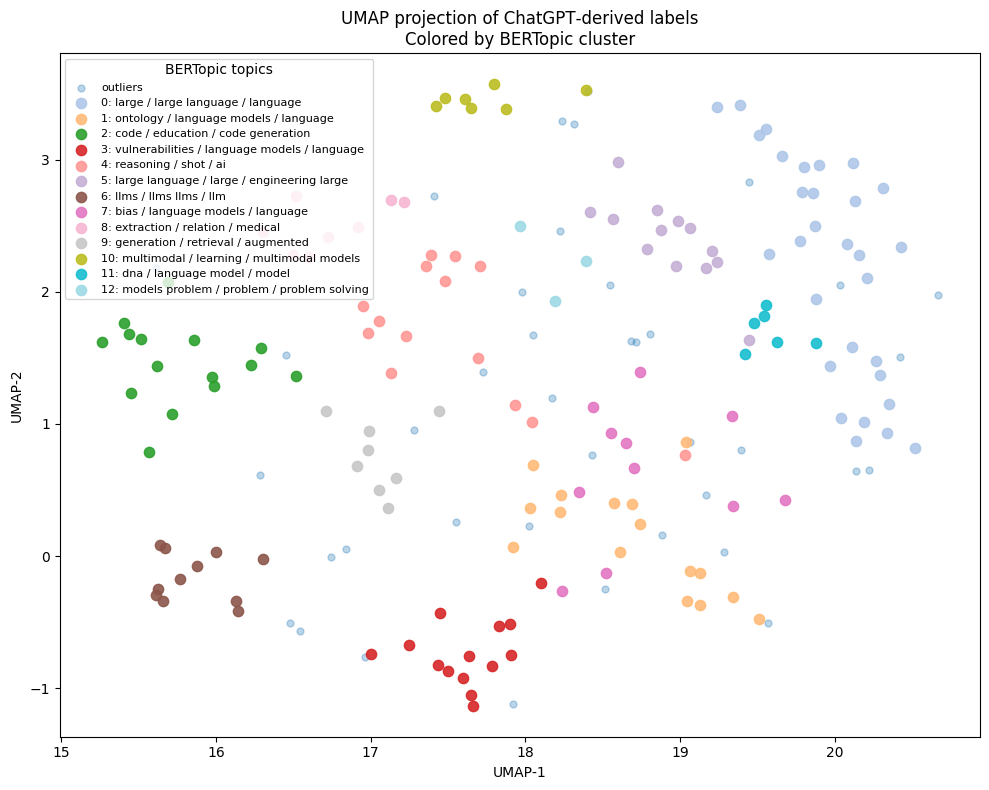

In [45]:
# ------------------------------------------------------------
# 2‑D visualization of BERTopic clustering
#   • Encode each ChatGPT label with the same ST model
#   • Project to 2‑D via UMAP
#   • Color by BERTopic topic id
# ------------------------------------------------------------
!pip -q install sentence-transformers umap-learn matplotlib

import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
from umap import UMAP
from sentence_transformers import SentenceTransformer

# 1. Encode the (short) labels with the same model BERTopic used
st_model   = SentenceTransformer("all-mpnet-base-v2")
embeddings = st_model.encode(labels, convert_to_numpy=True)  # shape [n_docs, dim]

# 2. 2‑D projection
xy = UMAP(n_neighbors=15, n_components=2, metric="cosine", random_state=42
         ).fit_transform(embeddings)

# 3. Prepare colors
topic_ids = np.array(topics)          # list returned by BERTopic
unique_ids = sorted(set(topic_ids))
palette = cm.get_cmap("tab20", len(unique_ids))
tid2color = {tid: palette(i) for i, tid in enumerate(unique_ids)}

# 4. Scatter plot
plt.figure(figsize=(10, 8))
for tid in unique_ids:
    mask = topic_ids == tid
    plt.scatter(xy[mask, 0], xy[mask, 1],
                c=[tid2color[tid]],
                s=55 if tid != -1 else 25,
                alpha=0.9 if tid != -1 else 0.3,
                label=("outliers" if tid == -1
                       else f"{tid}: "
                            + " / ".join([w for w, _ in topic_model.get_topic(tid)][:3])))

plt.legend(title="BERTopic topics", fontsize=8, loc="best")
plt.title("UMAP projection of ChatGPT‑derived labels\nColored by BERTopic cluster")
plt.xlabel("UMAP‑1")
plt.ylabel("UMAP‑2")
plt.tight_layout()
plt.show()